In [1]:
import matplotlib.pyplot as plt
import numpy as np


from tensorflow.keras.datasets import imdb
from tensorflow import keras

# Classifying movie reviews: IMDB

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\tools\miniconda3\envs\ml\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\tools\miniconda3\envs\ml\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max(max(sequence) for sequence in train_data)

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = {v:k for k,v in word_index.items()}
decoded_review = ' '.join(reverse_word_index.get(i - 3, '?') for i in train_data[0])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building your model

The input data is vectors, and the labels are scalars (1s and 0s): this is one of the simplest problem setups you’ll ever encounter. A type of model that performs well on such a problem is a plain stack of densely-connected (Dense) layers with relu activations.

There are two key architecture decisions to be made about such a stack of Dense layers:

    How many layers to use
    How many units to choose for each layer
    
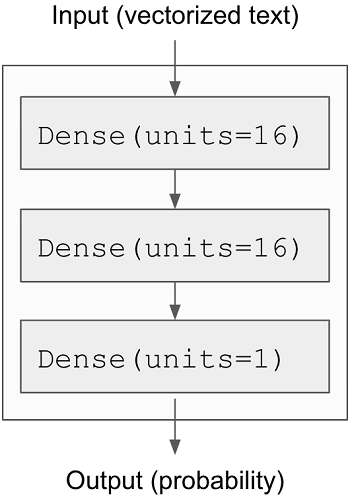

In [7]:
model = keras.Sequential([
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6394 - accuracy: 0.6110 - val_loss: 0.4354 - val_accuracy: 0.8635
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3710 - accuracy: 0.8884 - val_loss: 0.3300 - val_accuracy: 0.8757
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2488 - accuracy: 0.9258 - val_loss: 0.2848 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1956 - accuracy: 0.9362 - val_loss: 0.2840 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1503 - accuracy: 0.9560 - val_loss: 0.2808 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1200 - accuracy: 0.9648 - val_loss: 0.3245 - val_accuracy: 0.8745
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1004 - accuracy: 0.9709 - val_loss: 0.3054 - val_accuracy: 0.8845
Epoch 8/20
30

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

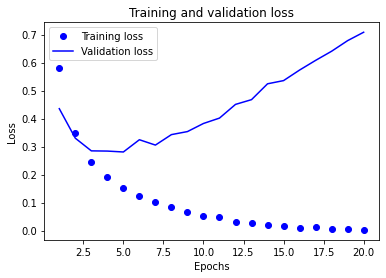

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

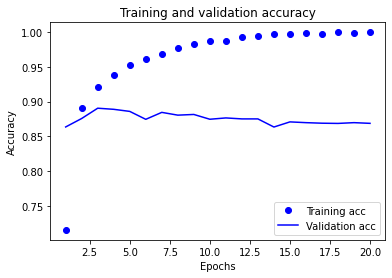

In [24]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [30]:
# the model overfits so we train a new model for only four epochs
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test, return_dict=True)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.5477 - accuracy: 0.7496 - val_loss: 0.3057 - val_accuracy: 0.9054
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2837 - accuracy: 0.9083 - val_loss: 0.2117 - val_accuracy: 0.9295
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2080 - accuracy: 0.9278 - val_loss: 0.1624 - val_accuracy: 0.9495
Epoch 4/4
782/782 [==============================] - 1s 987us/step - loss: 0.2892 - accuracy: 0.8857


In [31]:
results

{'loss': 0.2891869843006134, 'accuracy': 0.8857200145721436}

In [28]:
model.predict(x_test)

array([[0.19458747],
       [0.9996729 ],
       [0.85472643],
       ...,
       [0.1330226 ],
       [0.0818207 ],
       [0.53804475]], dtype=float32)

## Experiments

In [35]:
# only one layer
model = keras.Sequential([
  #keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5787 - accuracy: 0.6987 - val_loss: 0.3965 - val_accuracy: 0.8649
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3392 - accuracy: 0.9018 - val_loss: 0.3361 - val_accuracy: 0.8748
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2599 - accuracy: 0.9231 - val_loss: 0.2967 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2054 - accuracy: 0.9388 - val_loss: 0.2793 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1749 - accuracy: 0.9497 - val_loss: 0.2754 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1517 - accuracy: 0.9544 - val_loss: 0.3143 - val_accuracy: 0.8750
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1314 - accuracy: 0.9638 - val_loss: 0.2795 - val_accuracy: 0.8892
Epoch 8/20
30

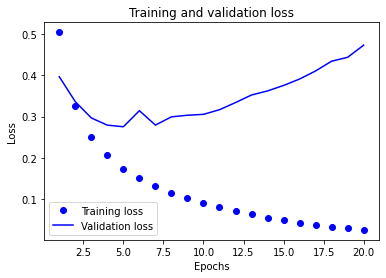

In [36]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [37]:
# only one layer
model = keras.Sequential([
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5979 - accuracy: 0.6813 - val_loss: 0.4253 - val_accuracy: 0.8209
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3201 - accuracy: 0.8972 - val_loss: 0.3002 - val_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2172 - accuracy: 0.9324 - val_loss: 0.2793 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1619 - accuracy: 0.9486 - val_loss: 0.2831 - val_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1245 - accuracy: 0.9628 - val_loss: 0.3054 - val_accuracy: 0.8800
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1028 - accuracy: 0.9693 - val_loss: 0.3444 - val_accuracy: 0.8770
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0812 - accuracy: 0.9778 - val_loss: 0.4048 - val_accuracy: 0.8649
Epoch 8/20
30

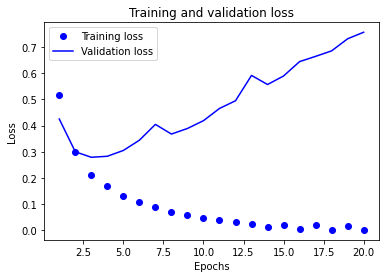

In [38]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [39]:
# only one layer
model = keras.Sequential([
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5625 - accuracy: 0.6918 - val_loss: 0.3207 - val_accuracy: 0.8806
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2587 - accuracy: 0.9096 - val_loss: 0.3068 - val_accuracy: 0.8765
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1888 - accuracy: 0.9289 - val_loss: 0.2804 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1535 - accuracy: 0.9432 - val_loss: 0.2987 - val_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0942 - accuracy: 0.9721 - val_loss: 0.3301 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0809 - accuracy: 0.9757 - val_loss: 0.3429 - val_accuracy: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0613 - accuracy: 0.9812 - val_loss: 0.3789 - val_accuracy: 0.8788
Epoch 8/20
30

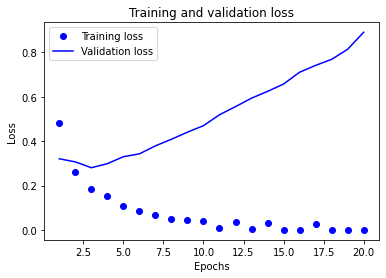

In [40]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [41]:
# only one layer
model = keras.Sequential([
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5730 - accuracy: 0.6962 - val_loss: 0.3415 - val_accuracy: 0.8771
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2766 - accuracy: 0.9052 - val_loss: 0.2826 - val_accuracy: 0.8910
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1852 - accuracy: 0.9393 - val_loss: 0.2971 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1452 - accuracy: 0.9496 - val_loss: 0.3935 - val_accuracy: 0.8547
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1140 - accuracy: 0.9638 - val_loss: 0.3385 - val_accuracy: 0.8790
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0844 - accuracy: 0.9750 - val_loss: 0.3890 - val_accuracy: 0.8664
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0677 - accuracy: 0.9789 - val_loss: 0.3834 - val_accuracy: 0.8785
Epoch 8/20
30

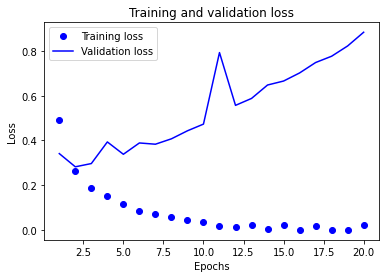

In [42]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [43]:
# only one layer
model = keras.Sequential([
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1980 - accuracy: 0.7195 - val_loss: 0.1205 - val_accuracy: 0.8563
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0959 - accuracy: 0.9020 - val_loss: 0.0934 - val_accuracy: 0.8897
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0676 - accuracy: 0.9313 - val_loss: 0.0851 - val_accuracy: 0.8919
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0506 - accuracy: 0.9477 - val_loss: 0.0838 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0408 - accuracy: 0.9593 - val_loss: 0.0827 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0325 - accuracy: 0.9695 - val_loss: 0.0851 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0269 - accuracy: 0.9764 - val_loss: 0.0854 - val_accuracy: 0.8831
Epoch 8/20
30

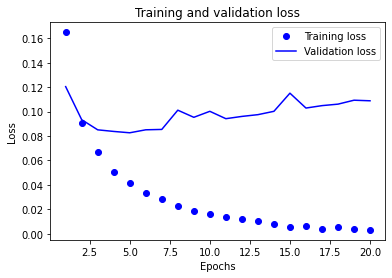

In [44]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [46]:
# only one layer
model = keras.Sequential([
  keras.layers.Dense(16, activation='tanh'),
  keras.layers.Dense(16, activation='tanh'),
  keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5673 - accuracy: 0.7101 - val_loss: 0.3772 - val_accuracy: 0.8585
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2997 - accuracy: 0.9056 - val_loss: 0.2887 - val_accuracy: 0.8885
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2033 - accuracy: 0.9356 - val_loss: 0.2950 - val_accuracy: 0.8795
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1486 - accuracy: 0.9518 - val_loss: 0.2777 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1097 - accuracy: 0.9663 - val_loss: 0.3024 - val_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0868 - accuracy: 0.9745 - val_loss: 0.3417 - val_accuracy: 0.8771
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0626 - accuracy: 0.9819 - val_loss: 0.3744 - val_accuracy: 0.8779
Epoch 8/20
30

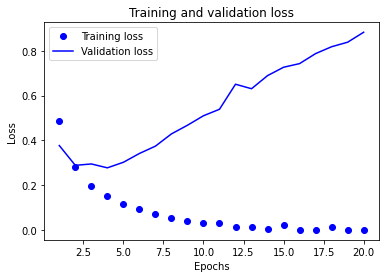

In [47]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Classifying newswire: Reuters

In this section, you’ll build a model to classify Reuters newswires into 46 mutually exclusive topics. Because you have many classes, this problem is an instance of multiclass classification; and because each data point should be classified into only one category, the problem is more specifically an instance of single-label, multiclass classification. 

In [10]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


c:\tools\miniconda3\envs\ml\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\tools\miniconda3\envs\ml\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [12]:
len(train_data), len(test_data)


(8982, 2246)

In [13]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [25]:
word_index = reuters.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[1]])

In [26]:
decoded_newswire

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [27]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [29]:
# built-in way in keras
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [32]:
one_hot_train_labels.shape # from 8982x1 to 8982x46

(8982, 46)

In a stack of Dense layers like that you’ve been using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottleneck. In the previous example, you used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

In [33]:
model = keras.Sequential([
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(46, activation='softmax')
])

The last layer uses a `softmax` activation. You saw this pattern in the MNIST example. It means the model will output a probability distribution over the 46 different output classes — for every input sample, the model will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.

The best loss function to use in this case is `categorical_crossentropy`. It measures the distance between two probability distributions: here, between the probability distribution output by the model and the true distribution of the labels. By minimizing the distance between these two distributions, you train the model to output something as close as possible to the true labels.

In [34]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
from sklearn.model_selection import train_test_split

partial_x_train, x_val, partial_y_train, y_val = train_test_split(x_train, one_hot_train_labels, train_size=0.8)

In [38]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
15/15 [==============================] - 1s 38ms/step - loss: 3.2556 - accuracy: 0.4083 - val_loss: 1.8099 - val_accuracy: 0.6260
Epoch 2/20
15/15 [==============================] - 0s 16ms/step - loss: 1.5738 - accuracy: 0.6831 - val_loss: 1.4363 - val_accuracy: 0.7017
Epoch 3/20
15/15 [==============================] - 0s 16ms/step - loss: 1.2009 - accuracy: 0.7596 - val_loss: 1.2090 - val_accuracy: 0.7440
Epoch 4/20
15/15 [==============================] - 0s 17ms/step - loss: 0.9252 - accuracy: 0.8140 - val_loss: 1.1365 - val_accuracy: 0.7507
Epoch 5/20
15/15 [==============================] - 0s 17ms/step - loss: 0.7606 - accuracy: 0.8431 - val_loss: 1.0390 - val_accuracy: 0.7774
Epoch 6/20
15/15 [==============================] - 0s 16ms/step - loss: 0.6093 - accuracy: 0.8760 - val_loss: 0.9860 - val_accuracy: 0.7796
Epoch 7/20
15/15 [==============================] - 0s 16ms/step - loss: 0.4918 - accuracy: 0.8992 - val_loss: 1.0323 - val_accuracy: 0.7774
Epoch 8/20
15

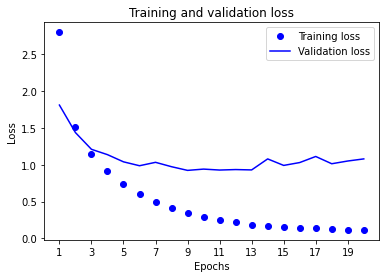

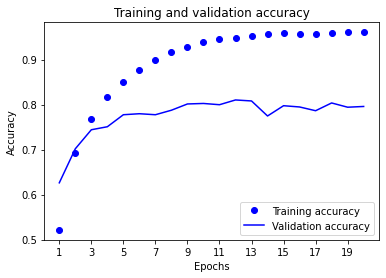

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.xticks(range(1, len(loss) + 1, 2))
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.xticks(range(1, len(loss) + 1, 2))
plt.ylabel('Accuracy')
plt.legend()
None

The model begins to overfit after nine epochs. Let’s train a new model from scratch for nine epochs and then evaluate it on the test set.

In [54]:
model = keras.Sequential([
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels, return_dict=True)

Epoch 1/9
15/15 [==============================] - 1s 27ms/step - loss: 3.2819 - accuracy: 0.3109 - val_loss: 1.8539 - val_accuracy: 0.6650
Epoch 2/9
15/15 [==============================] - 0s 18ms/step - loss: 1.6161 - accuracy: 0.6867 - val_loss: 1.4049 - val_accuracy: 0.7212
Epoch 3/9
15/15 [==============================] - 0s 17ms/step - loss: 1.1539 - accuracy: 0.7579 - val_loss: 1.2206 - val_accuracy: 0.7362
Epoch 4/9
15/15 [==============================] - 0s 16ms/step - loss: 0.9090 - accuracy: 0.8072 - val_loss: 1.0944 - val_accuracy: 0.7618
Epoch 5/9
15/15 [==============================] - 0s 16ms/step - loss: 0.7321 - accuracy: 0.8493 - val_loss: 1.0421 - val_accuracy: 0.7735
Epoch 6/9
15/15 [==============================] - 0s 18ms/step - loss: 0.5786 - accuracy: 0.8840 - val_loss: 0.9950 - val_accuracy: 0.7824
Epoch 7/9
15/15 [==============================] - 0s 16ms/step - loss: 0.4763 - accuracy: 0.9051 - val_loss: 0.9420 - val_accuracy: 0.8013
Epoch 8/9
15/15 [===

In [55]:
results

{'loss': 1.029529333114624, 'accuracy': 0.7804986834526062}

This approach reaches an accuracy of ~80%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case, we have 46 classes, and they may not be equally represented. What would be the accuracy of a random baseline? We could try quickly implementing one to check this empirically:

In [68]:
guess = np.random.randint(1, 47, size=len(test_labels))
np.mean(guess == test_labels) # pure guessing is around 2%

0.02226179875333927

In [71]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = test_labels == test_labels_copy
np.mean(hits_array) # because the labels are not balanced between the 46 categories, the baseline is much higher than 2%

0.18388245770258238

In [72]:
predictions = model.predict(x_test)

In [74]:
predictions.shape

(2246, 46)

In [76]:
predictions.sum(axis=1) # each row sums up to one over all 46 columns

array([1.0000001 , 0.9999997 , 0.99999946, ..., 1.0000005 , 0.99999994,
       0.9999999 ], dtype=float32)

In [77]:
np.argmax(predictions[0]) # the column with the highest value -> class prediction

3

In [84]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

partial_x_train, x_val, partial_y_train, y_val = train_test_split(x_train, y_train, train_size=0.8)

In [85]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test, return_dict=True)

Epoch 1/9
15/15 [==============================] - 0s 20ms/step - loss: 0.1189 - accuracy: 0.9598 - val_loss: 0.5752 - val_accuracy: 0.8798
Epoch 2/9
15/15 [==============================] - 0s 16ms/step - loss: 0.1151 - accuracy: 0.9616 - val_loss: 0.5898 - val_accuracy: 0.8731
Epoch 3/9
15/15 [==============================] - 0s 16ms/step - loss: 0.1113 - accuracy: 0.9609 - val_loss: 0.6007 - val_accuracy: 0.8831
Epoch 4/9
15/15 [==============================] - 0s 16ms/step - loss: 0.1043 - accuracy: 0.9626 - val_loss: 0.5947 - val_accuracy: 0.8859
Epoch 5/9
15/15 [==============================] - 0s 17ms/step - loss: 0.1017 - accuracy: 0.9613 - val_loss: 0.6230 - val_accuracy: 0.8815
Epoch 6/9
15/15 [==============================] - 0s 16ms/step - loss: 0.1005 - accuracy: 0.9613 - val_loss: 0.6533 - val_accuracy: 0.8804
Epoch 7/9
15/15 [==============================] - 0s 16ms/step - loss: 0.1010 - accuracy: 0.9624 - val_loss: 0.6643 - val_accuracy: 0.8753
Epoch 8/9
15/15 [===

In [88]:
results

{'loss': 1.2929179668426514, 'accuracy': 0.7853962779045105}

In [101]:
# lets see what happens if a layer becomes a bottleneck

model = keras.Sequential([
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(4, activation='relu'),
  keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
15/15 [==============================] - 1s 26ms/step - loss: 3.6780 - accuracy: 0.0444 - val_loss: 3.3713 - val_accuracy: 0.0913
Epoch 2/20
15/15 [==============================] - 0s 17ms/step - loss: 3.2140 - accuracy: 0.1055 - val_loss: 3.0880 - val_accuracy: 0.3623
Epoch 3/20
15/15 [==============================] - 0s 17ms/step - loss: 2.8435 - accuracy: 0.4143 - val_loss: 2.8096 - val_accuracy: 0.3779
Epoch 4/20
15/15 [==============================] - 0s 16ms/step - loss: 2.5337 - accuracy: 0.4213 - val_loss: 2.5446 - val_accuracy: 0.3829
Epoch 5/20
15/15 [==============================] - 0s 17ms/step - loss: 2.2474 - accuracy: 0.4392 - val_loss: 2.3722 - val_accuracy: 0.3973
Epoch 6/20
15/15 [==============================] - 0s 16ms/step - loss: 2.0583 - accuracy: 0.4436 - val_loss: 2.2132 - val_accuracy: 0.4046
Epoch 7/20
15/15 [==============================] - 0s 16ms/step - loss: 1.8571 - accuracy: 0.4784 - val_loss: 2.0714 - val_accuracy: 0.4407
Epoch 8/20
15

[1.503719449043274, 0.6918966770172119]

## Experiments

In [94]:
# lets see what happens if a layer becomes a bottleneck

model = keras.Sequential([
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
15/15 [==============================] - 1s 31ms/step - loss: 2.8101 - accuracy: 0.3953 - val_loss: 1.8452 - val_accuracy: 0.4691
Epoch 2/20
15/15 [==============================] - 0s 21ms/step - loss: 1.2856 - accuracy: 0.6955 - val_loss: 1.2711 - val_accuracy: 0.7340
Epoch 3/20
15/15 [==============================] - 0s 23ms/step - loss: 0.9041 - accuracy: 0.8106 - val_loss: 1.0894 - val_accuracy: 0.7602
Epoch 4/20
15/15 [==============================] - 0s 21ms/step - loss: 0.6370 - accuracy: 0.8663 - val_loss: 1.1046 - val_accuracy: 0.7551
Epoch 5/20
15/15 [==============================] - 0s 21ms/step - loss: 0.4911 - accuracy: 0.8981 - val_loss: 1.0158 - val_accuracy: 0.8041
Epoch 6/20
15/15 [==============================] - 0s 23ms/step - loss: 0.3566 - accuracy: 0.9336 - val_loss: 1.1519 - val_accuracy: 0.7646
Epoch 7/20
15/15 [==============================] - 0s 21ms/step - loss: 0.3002 - accuracy: 0.9372 - val_loss: 1.1094 - val_accuracy: 0.7585
Epoch 8/20
15

[1.3188791275024414, 0.7804986834526062]

In [95]:
# lets see what happens if a layer becomes a bottleneck

model = keras.Sequential([
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
15/15 [==============================] - 1s 21ms/step - loss: 3.4026 - accuracy: 0.3433 - val_loss: 2.3622 - val_accuracy: 0.5442
Epoch 2/20
15/15 [==============================] - 0s 11ms/step - loss: 2.0474 - accuracy: 0.6424 - val_loss: 1.7604 - val_accuracy: 0.6539
Epoch 3/20
15/15 [==============================] - 0s 12ms/step - loss: 1.5331 - accuracy: 0.6955 - val_loss: 1.5004 - val_accuracy: 0.6895
Epoch 4/20
15/15 [==============================] - 0s 11ms/step - loss: 1.2419 - accuracy: 0.7424 - val_loss: 1.3360 - val_accuracy: 0.7084
Epoch 5/20
15/15 [==============================] - 0s 12ms/step - loss: 1.0535 - accuracy: 0.7804 - val_loss: 1.2470 - val_accuracy: 0.7223
Epoch 6/20
15/15 [==============================] - 0s 11ms/step - loss: 0.9030 - accuracy: 0.8094 - val_loss: 1.1898 - val_accuracy: 0.7318
Epoch 7/20
15/15 [==============================] - 0s 11ms/step - loss: 0.7944 - accuracy: 0.8287 - val_loss: 1.2029 - val_accuracy: 0.7273
Epoch 8/20
15

[1.0691677331924438, 0.7845057845115662]

In [96]:
# lets see what happens if a layer becomes a bottleneck

model = keras.Sequential([
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(16, activation='relu'),
  keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
15/15 [==============================] - 1s 19ms/step - loss: 3.5475 - accuracy: 0.0806 - val_loss: 3.0506 - val_accuracy: 0.4719
Epoch 2/20
15/15 [==============================] - 0s 10ms/step - loss: 2.9092 - accuracy: 0.5862 - val_loss: 2.5924 - val_accuracy: 0.5754
Epoch 3/20
15/15 [==============================] - 0s 10ms/step - loss: 2.3931 - accuracy: 0.6346 - val_loss: 2.1878 - val_accuracy: 0.6060
Epoch 4/20
15/15 [==============================] - 0s 10ms/step - loss: 1.9869 - accuracy: 0.6486 - val_loss: 1.8936 - val_accuracy: 0.6188
Epoch 5/20
15/15 [==============================] - 0s 10ms/step - loss: 1.6993 - accuracy: 0.6577 - val_loss: 1.7143 - val_accuracy: 0.6183
Epoch 6/20
15/15 [==============================] - 0s 10ms/step - loss: 1.4739 - accuracy: 0.6823 - val_loss: 1.5605 - val_accuracy: 0.6388
Epoch 7/20
15/15 [==============================] - 0s 10ms/step - loss: 1.3135 - accuracy: 0.7075 - val_loss: 1.4690 - val_accuracy: 0.6667
Epoch 8/20
15

[1.1228015422821045, 0.7600178122520447]

In [97]:
# lets see what happens if a layer becomes a bottleneck

model = keras.Sequential([
  keras.layers.Dense(6, activation='relu'),
  keras.layers.Dense(6, activation='relu'),
  keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
15/15 [==============================] - 1s 20ms/step - loss: 3.7322 - accuracy: 0.0836 - val_loss: 3.4702 - val_accuracy: 0.2604
Epoch 2/20
15/15 [==============================] - 0s 10ms/step - loss: 3.4185 - accuracy: 0.2438 - val_loss: 3.2285 - val_accuracy: 0.2615
Epoch 3/20
15/15 [==============================] - 0s 10ms/step - loss: 3.1729 - accuracy: 0.2425 - val_loss: 3.0002 - val_accuracy: 0.2666
Epoch 4/20
15/15 [==============================] - 0s 10ms/step - loss: 2.9112 - accuracy: 0.2546 - val_loss: 2.7932 - val_accuracy: 0.2922
Epoch 5/20
15/15 [==============================] - 0s 10ms/step - loss: 2.7154 - accuracy: 0.3331 - val_loss: 2.5999 - val_accuracy: 0.4814
Epoch 6/20
15/15 [==============================] - 0s 10ms/step - loss: 2.5222 - accuracy: 0.5118 - val_loss: 2.4324 - val_accuracy: 0.5364
Epoch 7/20
15/15 [==============================] - 0s 10ms/step - loss: 2.3265 - accuracy: 0.5542 - val_loss: 2.2814 - val_accuracy: 0.5576
Epoch 8/20
15

[1.4862538576126099, 0.6651825308799744]

In [98]:
# lets see what happens if a layer becomes a bottleneck

model = keras.Sequential([
  #keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
15/15 [==============================] - 1s 26ms/step - loss: 3.0594 - accuracy: 0.4398 - val_loss: 1.9008 - val_accuracy: 0.6233
Epoch 2/20
15/15 [==============================] - 0s 16ms/step - loss: 1.6043 - accuracy: 0.6959 - val_loss: 1.4996 - val_accuracy: 0.6656
Epoch 3/20
15/15 [==============================] - 0s 16ms/step - loss: 1.1636 - accuracy: 0.7629 - val_loss: 1.2541 - val_accuracy: 0.7429
Epoch 4/20
15/15 [==============================] - 0s 16ms/step - loss: 0.8945 - accuracy: 0.8255 - val_loss: 1.1538 - val_accuracy: 0.7507
Epoch 5/20
15/15 [==============================] - 0s 16ms/step - loss: 0.7317 - accuracy: 0.8518 - val_loss: 1.0661 - val_accuracy: 0.7663
Epoch 6/20
15/15 [==============================] - 0s 16ms/step - loss: 0.6215 - accuracy: 0.8782 - val_loss: 1.0800 - val_accuracy: 0.7440
Epoch 7/20
15/15 [==============================] - 0s 16ms/step - loss: 0.5086 - accuracy: 0.8993 - val_loss: 0.9679 - val_accuracy: 0.7974
Epoch 8/20
15

[1.0377956628799438, 0.792965292930603]

In [99]:
# lets see what happens if a layer becomes a bottleneck

model = keras.Sequential([
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
15/15 [==============================] - 1s 28ms/step - loss: 3.2323 - accuracy: 0.3840 - val_loss: 1.8331 - val_accuracy: 0.6055
Epoch 2/20
15/15 [==============================] - 0s 17ms/step - loss: 1.5740 - accuracy: 0.6769 - val_loss: 1.4306 - val_accuracy: 0.6761
Epoch 3/20
15/15 [==============================] - 0s 17ms/step - loss: 1.1583 - accuracy: 0.7361 - val_loss: 1.2673 - val_accuracy: 0.7162
Epoch 4/20
15/15 [==============================] - 0s 17ms/step - loss: 0.9109 - accuracy: 0.7921 - val_loss: 1.2336 - val_accuracy: 0.7095
Epoch 5/20
15/15 [==============================] - 0s 17ms/step - loss: 0.7663 - accuracy: 0.8278 - val_loss: 1.2479 - val_accuracy: 0.7290
Epoch 6/20
15/15 [==============================] - 0s 19ms/step - loss: 0.6304 - accuracy: 0.8595 - val_loss: 1.4294 - val_accuracy: 0.6633
Epoch 7/20
15/15 [==============================] - 0s 17ms/step - loss: 0.5419 - accuracy: 0.8719 - val_loss: 1.1225 - val_accuracy: 0.7557
Epoch 8/20
15

[1.422398567199707, 0.7569011449813843]

In [100]:
# lets see what happens if a layer becomes a bottleneck

model = keras.Sequential([
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Epoch 1/20
15/15 [==============================] - 1s 31ms/step - loss: 3.0752 - accuracy: 0.4127 - val_loss: 1.7575 - val_accuracy: 0.5843
Epoch 2/20
15/15 [==============================] - 0s 21ms/step - loss: 1.4878 - accuracy: 0.6847 - val_loss: 1.3841 - val_accuracy: 0.6973
Epoch 3/20
15/15 [==============================] - 0s 21ms/step - loss: 1.0778 - accuracy: 0.7638 - val_loss: 1.2736 - val_accuracy: 0.7206
Epoch 4/20
15/15 [==============================] - 0s 23ms/step - loss: 0.8789 - accuracy: 0.8067 - val_loss: 1.2137 - val_accuracy: 0.7474
Epoch 5/20
15/15 [==============================] - 0s 21ms/step - loss: 0.7095 - accuracy: 0.8441 - val_loss: 1.1213 - val_accuracy: 0.7563
Epoch 6/20
15/15 [==============================] - 0s 21ms/step - loss: 0.5595 - accuracy: 0.8755 - val_loss: 1.1569 - val_accuracy: 0.7457
Epoch 7/20
15/15 [==============================] - 0s 23ms/step - loss: 0.4411 - accuracy: 0.9005 - val_loss: 1.1925 - val_accuracy: 0.7468
Epoch 8/20
15

[1.7044944763183594, 0.7364202737808228]

# Predicting house prices: Regression example with Boston Housing Price

You’ll attempt to predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on. The dataset you’ll use has an interesting difference from the two previous examples. It has relatively few data points: only 506, split between 404 training samples and 102 test samples. And each feature in the input data (for example, the crime rate) has a different scale. For instance, some values are proportions, which take values between 0 and 1; others take values between 1 and 12, others between 0 and 100, and so on.

In [157]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [158]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [159]:
# The targets are the median values of owner-occupied homes, in thousands of dollars:

train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

It would be problematic to feed into a neural network values that all take wildly different ranges. The model might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in NumPy.

In [106]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

Note that the quantities used for normalizing the test data are computed using the training data. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.

## Building your model

In [160]:
def build_model():
    model = keras.Sequential([
      keras.layers.Dense(16, activation='relu'),
      keras.layers.Dense(16, activation='relu'),
      keras.layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Note that you compile the model with the mse loss function — mean squared error, the square of the difference between the predictions and the targets. This is a widely used loss function for regression problems.

You’re also monitoring a new metric during training: mean absolute error (MAE). It’s the absolute value of the difference between the predictions and the targets. For instance, an MAE of 0.5 on this problem would mean your predictions are off by $500 on average.

## cross-validation

To evaluate your model while you keep adjusting its parameters (such as the number of epochs used for training), you could split the data into a training set and a validation set, as you did in the previous examples. But because you have so few data points, the validation set would end up being very small (for instance, about 100 examples). As a consequence, the validation scores might change a lot depending on which data points you chose to use for validation and which you chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent you from reliably evaluating your model.

In [161]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"processing fold {i}.")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
          
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
          
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
          
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold 0.
processing fold 1.
processing fold 2.
processing fold 3.


In [162]:
all_scores, np.mean(all_scores)

([2.9108529090881348,
  4.024935245513916,
  3.0023016929626465,
  3.9568631649017334],
 3.4737382531166077)

In [111]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f'processing fold {i+1}.')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold 1.
processing fold 2.
processing fold 3.
processing fold 4.


In [128]:
all_mae_histories_array = np.array(all_mae_histories)
average_mae_history = all_mae_histories_array.mean(axis=0)

Text(0, 0.5, 'Validation MAE')

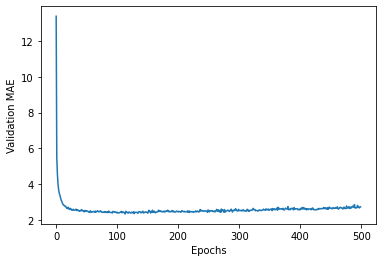

In [129]:
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

Text(0, 0.5, 'Validation MAE')

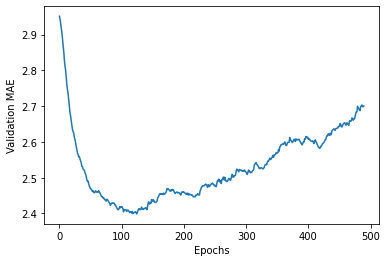

In [153]:
def smooth_curve(points, factor=0.9):
    smoothed_points = np.zeros(points.shape)
    smoothed_points[0] = points[0]
    
    for i, point in enumerate(points[1:], start=1):
        previous = smoothed_points[i-1]
        smoothed_points[i] = previous * factor + point * (1 - factor)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

In [155]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 666us/step - loss: 19.1621 - mae: 3.0012


In [156]:
predictions = model.predict(test_data)
predictions[0]

array([9.075513], dtype=float32)